In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
ap=pd.read_csv('D:\Imarticus Learning\DATASETS\AirPassengers.csv')

In [3]:
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
ap.shape

(144, 2)

In [5]:
ap.isnull().sum()[ap.isnull().sum()>0]

Series([], dtype: int64)

In [6]:
# Aim:- forecast the value for next 2 years

In [7]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
ap.Month=pd.to_datetime(ap.Month)

In [9]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
ap=ap.set_index('Month')

In [11]:
ap.head(15)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [12]:
ap.shape

(144, 1)

In [13]:
import matplotlib.pyplot as plt

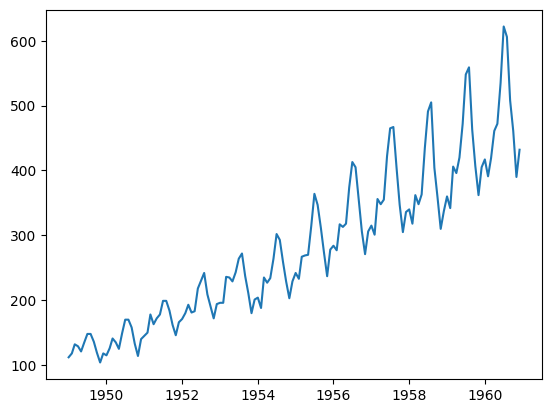

In [14]:
plt.plot(ap)

In [15]:
from statsmodels.tsa.stattools import adfuller # adfuller is used to check if data is stationary or not
# in adf the null hypothesis is that series is not stationary (not in syllabus)

In [75]:
adfuller(ap.diff().diff().dropna())

(-16.384231542468516,
 2.7328918500141235e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.602041727561)

In [76]:
from statsmodels.tsa.stattools import kpss # is used to check series is stationary or not
# nulls in kpss is exactly opposite to ADF
# in kpss the null hypothesis is that seris is stationary
# in adfuller the null hypothesis is that series is not stationary

In [78]:
kpss(ap.diff().dropna())

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.023897614400183963,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
ad

In [16]:
# data is seasonal within year and uptrend within year

In [17]:
ap.diff()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


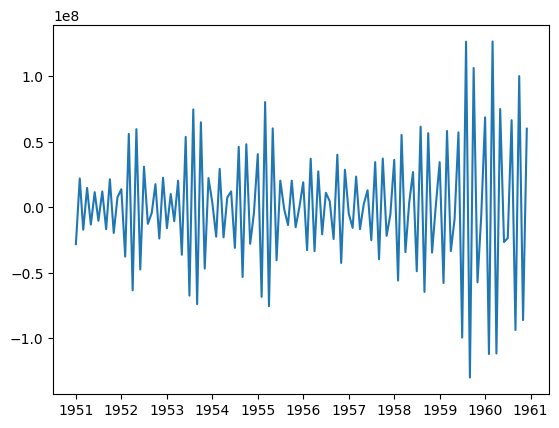

In [18]:
plt.plot(ap.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())

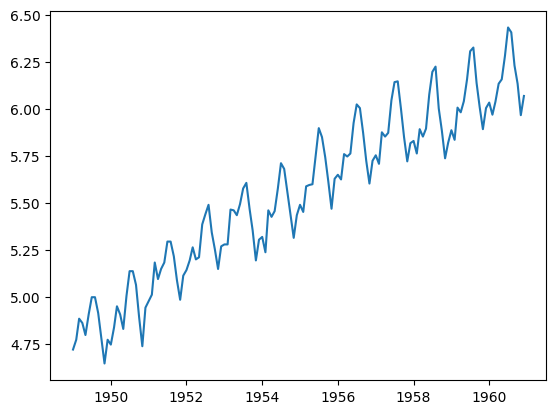

In [19]:
ap1=np.log(ap)
plt.plot(ap1)

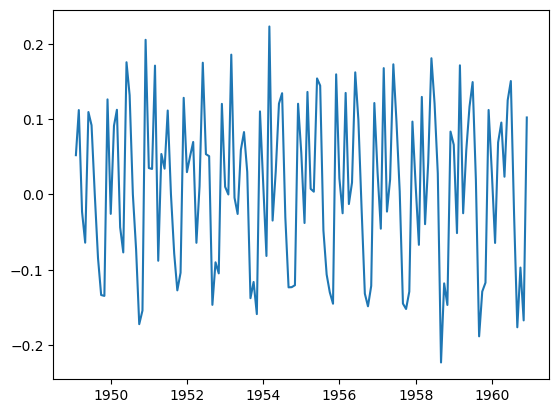

In [20]:
plt.plot(ap1.diff())

In [21]:
# taking log and then level 1 diff D-->1
ap1 # model is build on ap1--> PREDICTION 
# to get the answer in actual numbers --> anti log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [22]:
from pmdarima.arima import auto_arima

In [23]:
#pip install pmdarima

In [24]:
auto_arima(ap1,seasonal=True  , m= 12) # pass these values in sarimax

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [25]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [26]:
# VALUES FROM AUTO ARIMA IS PASSED TO SARIMAX

In [27]:
model_sarima = SARIMAX(ap1, order = (2,0,0), seasonal_order= (0,1,1,12)) # create the instanse 

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
results = model_sarima.fit() # fit the model 

In [29]:
pred_log =results.predict(start = 144 , end = 167)

# prediction fo next 24 months

In [30]:
pred = np.round(np.exp(pred_log))

In [31]:
pred

#   predictions are good or not good ???


1961-01-01    448.0
1961-02-01    422.0
1961-03-01    475.0
1961-04-01    487.0
1961-05-01    503.0
1961-06-01    576.0
1961-07-01    661.0
1961-08-01    657.0
1961-09-01    549.0
1961-10-01    488.0
1961-11-01    422.0
1961-12-01    468.0
1962-01-01    484.0
1962-02-01    457.0
1962-03-01    513.0
1962-04-01    526.0
1962-05-01    543.0
1962-06-01    621.0
1962-07-01    713.0
1962-08-01    708.0
1962-09-01    592.0
1962-10-01    526.0
1962-11-01    454.0
1962-12-01    503.0
Freq: MS, Name: predicted_mean, dtype: float64

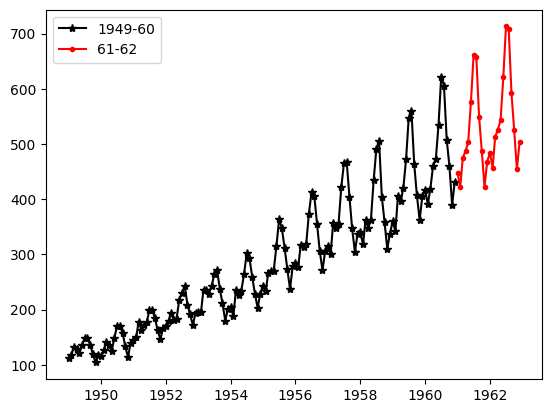

In [32]:
plt.plot(ap, color ='black'  , label ='1949-60',marker ="*")
plt.plot(pred, color ='red'  , label ='61-62', marker ='.')
plt.legend()

In [33]:
# seasonal , sampling

# SARIMAX



In [34]:
# AUTO ARIMA  -->SARIMAX

##  model on Resturant visitors

In [35]:
rv=pd.read_csv('D:\Imarticus Learning\DATASETS\RestaurantVisitors.csv', index_col = 'date', parse_dates= True)
rv.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1.0,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0.0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0.0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0.0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0.0,na,2.0,15.0,38.0,43.0,98.0


In [36]:
rv.shape

(498, 8)

In [37]:
rv.isnull().sum()

weekday         20
holiday         20
holiday_name    20
rest1           20
rest2           20
rest3           20
rest4           20
total           20
dtype: int64

In [38]:
rv = rv.dropna()

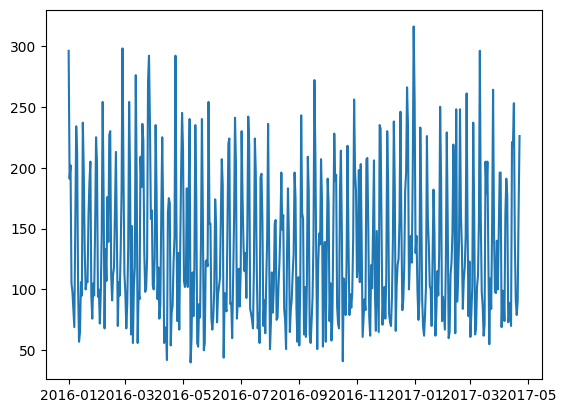

In [39]:
plt.plot(rv.total)

In [40]:
rv.shape

(478, 8)

In [41]:
rv_train = rv.iloc[0:450]
rv_test  = rv.iloc[450:478]

In [42]:
rv_test.head(2)

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-03-26,Sunday,0.0,na,33.0,27.0,48.0,38.0,146.0
2017-03-27,Monday,0.0,na,26.0,31.0,34.0,7.0,98.0


In [43]:
#  builld model on train and do testing on test

In [44]:
from pmdarima.arima import auto_arima

In [45]:
auto_arima(rv['total'], seasonal = True , m= 7)
# is on full data

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [46]:
from statsmodels.tsa.statespace.sarimax  import SARIMAX

In [47]:
mod_rv1  = SARIMAX(rv_train['total'], order =(0,0, 0), seasonal_order= (1,0,1,7))

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [48]:
res_rv1    = mod_rv1.fit()

In [49]:
pred_rv1 =np.round(res_rv1.predict(start = 450, end = 477))
#pred_rv1

In [50]:
rv_test['pred_rv1'] = list(pred_rv1)

In [51]:
rv_test[rv_test.holiday ==1]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,pred_rv1
date,,,,,,,,,
2017-04-14,Friday,1.0,Good Friday,41.0,74.0,57.0,49.0,221.0,145.0
2017-04-16,Sunday,1.0,Easter,58.0,35.0,60.0,100.0,253.0,174.0
2017-04-17,Monday,1.0,Easter Monday,63.0,21.0,24.0,32.0,140.0,91.0


In [52]:
# model is do in under prediction for holidays 

In [53]:
err_rv1 = rv_test['total']  - pred_rv1

In [54]:
from sklearn.metrics  import mean_absolute_percentage_error, mean_squared_error

In [55]:
mean_squared_error(rv_test['total']  , pred_rv1)

882.2142857142857

In [56]:
mean_absolute_percentage_error(rv_test['total']  , pred_rv1)* 100

16.050046533548997

In [57]:
#  x (EXOG), EXTERNAL FACTOR



In [58]:
# BUILDING MODEL USING EXTRENAL FACTOR

In [59]:
auto_arima(rv['total'], seasonal = True , m= 7, exogenous =rv[['holiday']])

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [60]:
mod_rv2  = SARIMAX(rv_train['total'], order =(0,0, 0), seasonal_order= (1,0,1,7) , exog =rv_train[['holiday']])

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [61]:
res_rv2    = mod_rv2.fit()

In [62]:
pred_rv2  = np.round(res_rv2.predict(start = 450, end = 477  ,exog =rv_test[['holiday']] ))

In [63]:
rv_test['pred_rv2'] = pred_rv2

In [64]:
rv_test[rv_test.holiday ==1]

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,pred_rv1,pred_rv2
date,,,,,,,,,,
2017-04-14,Friday,1.0,Good Friday,41.0,74.0,57.0,49.0,221.0,145.0,208.0
2017-04-16,Sunday,1.0,Easter,58.0,35.0,60.0,100.0,253.0,174.0,238.0
2017-04-17,Monday,1.0,Easter Monday,63.0,21.0,24.0,32.0,140.0,91.0,150.0


In [65]:
# mse , mape  

In [ ]:
# how to check stationarity
# plot,adf, kpss